## **Universidad Peruana de Ciencias Aplicadas**

### CC235 - Procesamiento de Imágenes

### Docente: Peter Montalvo <pcccpmon@upc.edu.pe>

### Tarea Académica 02

---

### **ALUMNO**

- Luis Felipe Poma Astete u2021110902


# Pregunta 1: Cortar y unir imágenes (7 puntos)

Desarrolle en Python **_una función_** que reciba 2 imágenes (imagen A y B); y como resultado de una imagen C; que tiene 2 partes: la primera mitad de A y la segunda mitad de B.

**Importante:** Considere que ambas imágenes pueden tener anchos distintos.


Ejemplo:

Imagen 1:

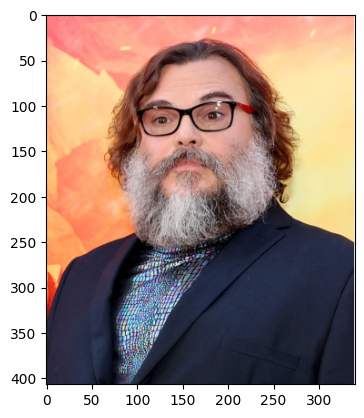


Imagen 2:

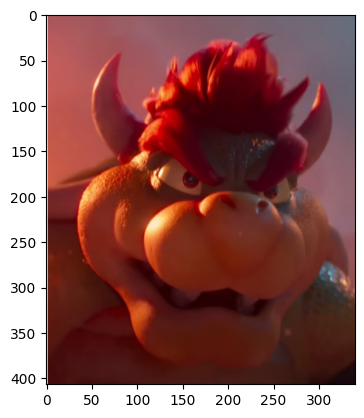


Imagen 2:

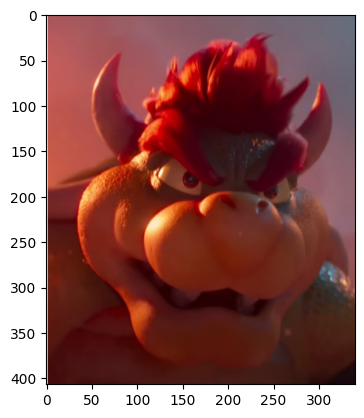


In [ ]:
!gdown --id 1UYdKVvZlYk8jA5mSHYMUUh5J0bLAXFRk

In [ ]:
!gdown --id 1Ydn_lPRNMbME4MNzuCwryw3eQvn_j96s

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
import cv2

im1 = plt.imread('imagen1.jpg')
plt.imshow(im1)

In [ ]:
im2 = plt.imread('imagen2.jpg')
plt.imshow(im2)

In [ ]:
im1 = im1[:350,:]

In [ ]:
im1.shape

In [ ]:
im2.shape

In [ ]:
# Desarrolle la función aquí
def cortar_y_unir(im1, im2):
    # Verificamos el ancho
    if im1.shape[0] != im2.shape[0]:
        print("Igualando....")
        im1 = resize(im1, (im2.shape[0], im1.shape[1]),
                     preserve_range=True).astype("int")
    mitad = int(im1.shape[1]/2)
    im_res = np.concatenate((im1[:, :mitad], im2[:, mitad:]), axis=1)
    return im_res

In [ ]:
# Pruebe su código aquí
plt.imshow(cortar_y_unir(im1, im2))

# Pregunta 2: LUT (13 puntos)

Crear un algoritmo que tome 6 parámetros (corte1, corte2, vmin, v1, v2, vmax) y genere un LUT que sea básicamente la línea que conecta los siguientes puntos:

- (0, vmin)
- (corte1, v1)
- (corte2, v2)
- (255, vmax)

Recuerde que vmin puede ser mayor que vmax (como en el caso de la transformación que lleva de negativo -> positivo), sin embargo considere que 0 < corte1 < corte2 < 255, aunque no tiene que realizar ninguna validación.

Puede ver la función de transferencia en la imagen a continuación

**Recomendación** puede usar la función `np.linspace`.

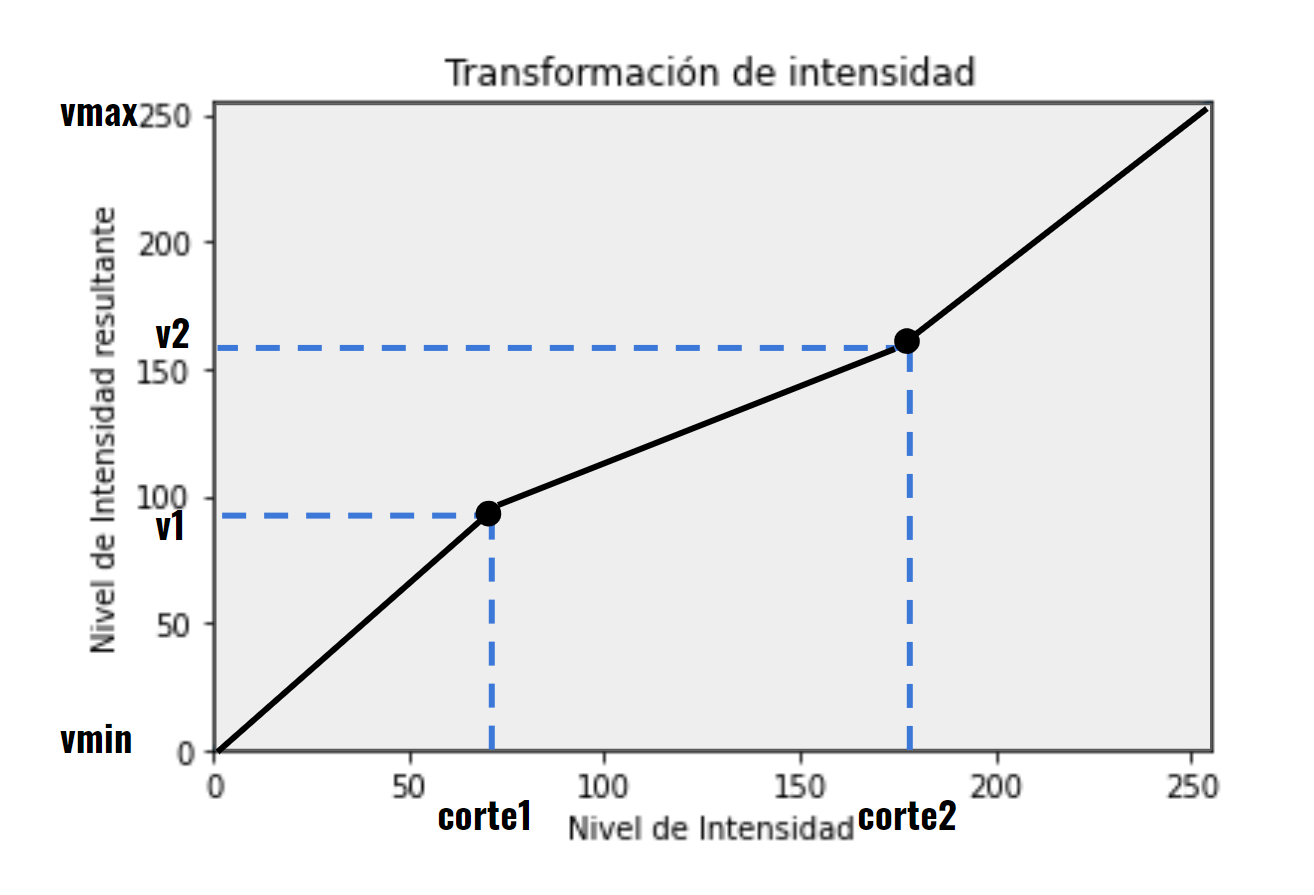


Se define un LUT (Look-up table) como una transformación de niveles de intensidad en imágenes en escala de grises.

**Por ejemplo:**

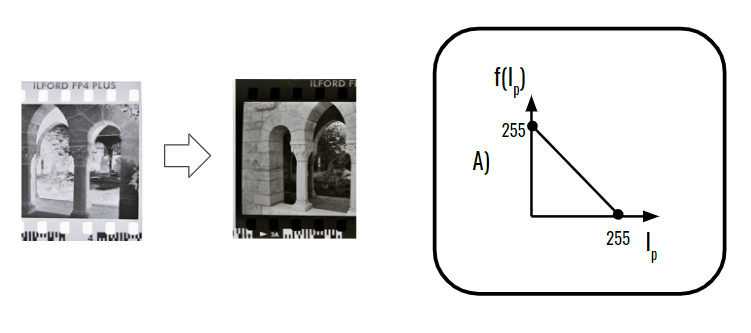

Esta transformación permite convertir una imagen de negativo->positivo (y viceversa). La ecuación que define está transformación se puede ver a continuación.

$I'_{x,y} = 255-I_{x,y}$

Cabe resaltar, que al aplicar esta transformación, el nivel de intensidad de cada pixel será reemplazado con el resultado de 255 menos el nivel de intensidad original.

Otra forma de realizar esta misma transformación de intensidad es usar un $LUT$ (lookup table), una suerte de diccionario, que mapea un valor de intensidad en la imagen al valor por el que será transformado. La ecuación a continuación muestra como es realizada la transformación usando un LUT.

$I'_{x,y} = LUT[I_{x,y}]$

Por ejemplo el diccionario (en una arreglo de numpy) para crear la transformación anterior (de negativo a positivo) sería así:

LUT = 255-np.arange(256)
print(LUT)

```
LUT = 255-np.arange(256)
print(LUT)
```


In [ ]:
# @title Crear LUT { run: "auto" }
corte1 = 64  # @param {type:"slider", min:0, max:255, step:1}
corte2 = 194  # @param {type:"slider", min:0, max:255, step:1}
vmin = 0  # @param {type:"slider", min:0, max:255, step:1}
v1 = 158  # @param {type:"slider", min:0, max:255, step:1}
v2 = 105  # @param {type:"slider", min:0, max:255, step:1}
vmax = 255  # @param {type:"slider", min:0, max:255, step:1}

def generar_LUT(corte1, corte2, vmin, v1, v2, vmax):
    ######## desarrollar aqui###############
    # Puede asumir que 0 < corte1 < corte2 < 255
    first = np.linspace(vmin, v1, corte1)
    second = np.linspace(v1, v2, corte2-corte1)
    last = np.linspace(v2, vmax, vmax-corte2+1)
    LUT = np.concatenate((first, second, last))
    ################################
    return LUT

Considere que la función llamada:

```
aplicar(im, LUT)
```

reciba una imagen en escala de grises y un arreglo de 256 (LUT - lookup table) tal que la imagen resultante sea transformada usando la regla $I'_{x,y} = LUT[I_{x,y}]$. Es decir, para cada pixel de la imagen (que puede tener un valor entre 0 y 255) se busca en la table LUT el valor por el que se reemplazará.


In [ ]:
def aplicar(im, LUT):
    assert im.ndim == 2  # verificamos que sea una imagen en escala de grises
    assert LUT.shape == (256,)  # verificamos que el arreglo
    ###### Implementar aquí ############
    nueva = list(map(lambda x: LUT[x].astype("int"), im))
    ####################################
    return nueva

A continuación, esta función puede mostrar la gráfica de función de transferencias de nuestra transformación


In [ ]:
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

In [ ]:
def generate_grid(corte1, corte2, vmin, v1, v2, vmax):
    
    # First Point
	plt.plot([vmin, corte1, corte1], [v1, v1,vmin], marker='none', ls="--", ms=15, color="lightgray" )
	
	#Second Point
	plt.plot([vmin, corte2, corte2], [v2, v2,vmin], marker='none', ls="--", ms=15, color="lightgray" )
	

In [ ]:
def generate_points(corte1, corte2, v1, v2):
	plt.plot([corte1, corte2], [v1, v2], marker='.', ls='none', ms=15, color="darkblue")
    

In [ ]:
plt.figure()
plt.title("Transformación de intensidad")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.xlabel("Nivel de Intensidad")
plt.ylabel("Nivel de Intensidad resultante")
generate_grid(corte1, corte2, vmin, v1, v2, vmax)
plt.plot(generar_LUT(corte1, corte2, vmin, v1, v2, vmax))
generate_points(corte1, corte2, v1, v2)

In [ ]:
plt.imshow(aplicar(im2, generar_LUT(
    corte1, corte2, vmin, v1, v2, vmax)), cmap='gray')